Analiza błędów

Zad_1:
Oblicz przybliżoną wartość pochodnej funkcji, używając wzoru:
f′(x)≈f(x+h)−f(x)h .
Sprawdź  działanie  programu  dla  funkcji:
tan(x) oraz x = 1.
Wyznacz błąd, porównując otrzymaną wartość numerycznej pochodnej z prawdziwą wartością. Pomocna będzie tożsamość:
tan′(x) = 1 + tan2(x).
Na wspólnym rysunku przedstaw wykresy wartości bezwględnej błędu meto-dy, błędu numerycznego oraz błędu obliczeniowego w zależności od h dla:
h=10−k, k= 0,...,16.
Użyj skali logarytmicznej na obu osiach. Czy wykres wartości bezwględnej błędu obliczeniowego posiada minimum?Porównaj wyznaczoną wartośćhminz wartością otrzymaną ze wzoru:
hmin≈2√e/M, gdzie M≈|f′′(x)|.
Powtórz ćwiczenie używając wzoru różnic centralnych:
f′(x)≈f(x+h)−f(x−h)2h.
Porównaj wyznaczoną wartośćhminz wartością otrzymaną ze wzoru:
hmin≈3√3e/M, gdzieM≈|f′′′(x)|.

Importy

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

Funkcje

In [5]:
def true_tan_value(x):
    return 1 + math.tan(x)**2

In [6]:
def derivative_1(f, x, h):
    df = (f(x + h) - f(x)) / h
    return df

In [7]:
def derivative_central(f, x, h):
    df = (f(x + h) - f(x - h)) / (2*h)
    return df

Zmienne

In [8]:
x = 1
h = [10**(-_) for _ in range(17)]
eps = np.finfo(np.float64).eps

In [9]:
correct = true_tan_value(x)

In [10]:
#print(correct)

In [11]:
values = [None for i in range(len(h))]
errors_m = [None for i in range(len(h))]
errors_n = [None for i in range(len(h))]
errors_o = [None for i in range(len(h))]
M = 10.6698589449753

In [12]:
def calculate_df_error():
    for i in range(17):
        values[i] = derivative_1(lambda x: math.tan(x), x, h[i])
        errors_o[i] = abs(values[i] - correct)
        errors_m[i] = M*h[i]/2
        errors_n[i] = 2*eps/h[i]

In [13]:
#print(values)
#print(errors_o)
#print(errors_m)
#print(errors_n)

In [14]:
calculate_df_error()

In [15]:
def visualize_1_1():
    plt.figure(figsize=(10, 6))

    plt.plot(h, errors_m, label='Błąd metody')
    plt.plot(h, errors_n, label='Błąd numeryczny')
    plt.plot(h, errors_o, label='Błąd obliczeniowy')
    

    plt.xlabel('Wartość h')
    plt.ylabel('Błąd')
    plt.yscale('log')
    plt.xscale('log')
    plt.title('Wykresy błędów')
    plt.legend()
    plt.show()

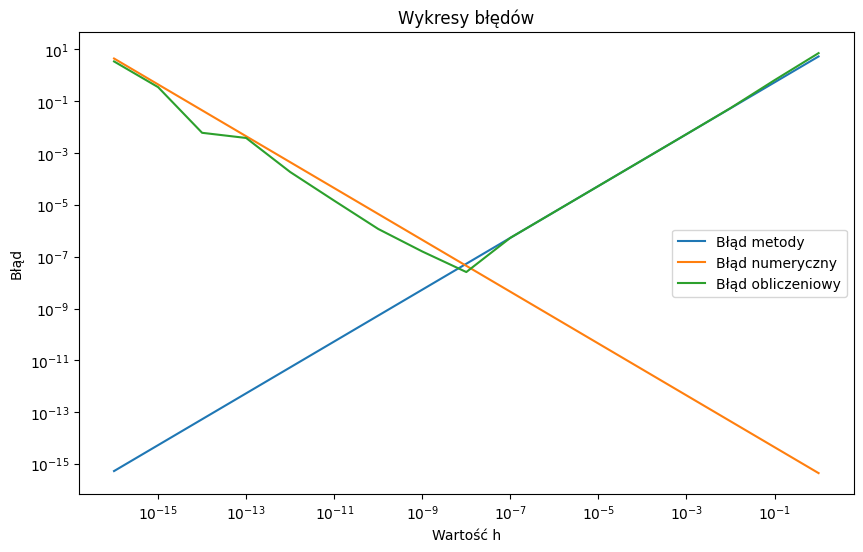

In [16]:
visualize_1_1()

In [17]:
values_c = [None for i in range(len(h))]
errors_cm = [None for i in range(len(h))]
errors_cn = [None for i in range(len(h))]
errors_co = [None for i in range(len(h))]
Mc = 56.7029998672778

In [18]:
def calculate_dfc_error():
    for i in range(17):
        values_c[i] = derivative_central(lambda x: math.tan(x), x, h[i])
        errors_co[i] = abs(values_c[i] - correct)
        errors_cm[i] = Mc*h[i]*h[i]/6
        errors_cn[i] = eps/h[i]

In [19]:
calculate_dfc_error()

In [20]:
#print(values_c)
#print(errors_cm)
print(errors_cn)
#print(errors_co)

[2.220446049250313e-16, 2.220446049250313e-15, 2.220446049250313e-14, 2.220446049250313e-13, 2.220446049250313e-12, 2.2204460492503128e-11, 2.220446049250313e-10, 2.220446049250313e-09, 2.220446049250313e-08, 2.2204460492503128e-07, 2.220446049250313e-06, 2.220446049250313e-05, 0.0002220446049250313, 0.002220446049250313, 0.02220446049250313, 0.22204460492503128, 2.220446049250313]


In [21]:
def visualize_1_2():
    plt.figure(figsize=(10, 6))

    plt.plot(h, errors_cm, label='Błąd metody')
    plt.plot(h, errors_cn, label='Błąd numeryczny')
    plt.plot(h, errors_co, label='Błąd obliczeniowy')

    plt.xlabel('Wartość h')
    plt.ylabel('Błąd')
    plt.yscale('log')
    plt.xscale('log')
    plt.title('Wykresy błędów')
    plt.legend()
    plt.show()

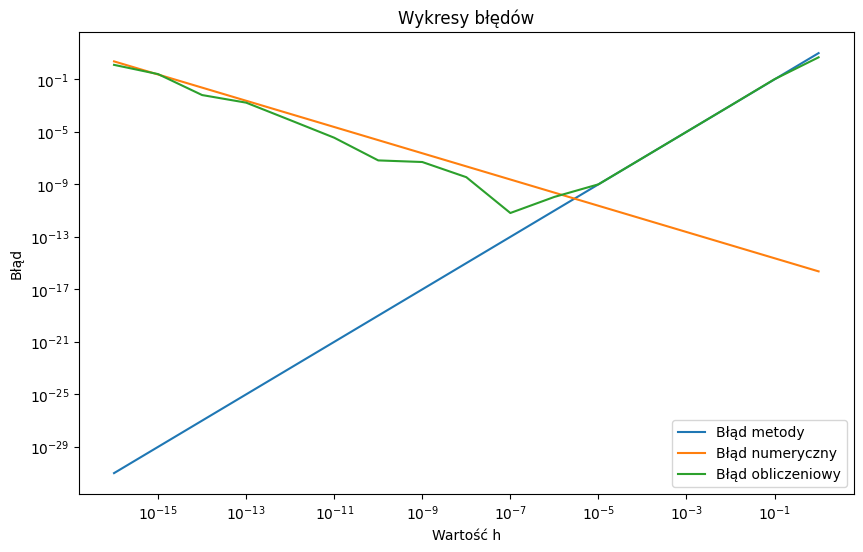

In [22]:
visualize_1_2()

Porównanie wartości h[min] z wykresu do tej ze wzoru

In [23]:
h_min_1 = 2 * math.sqrt(eps/M)
h_min_2 = (3*eps/Mc) ** (1/3)

In [24]:
print(h_min_1 - min(errors_o))
print(h_min_2 - min(errors_co))

-1.6417657363295768e-08
2.2732679338169658e-06


Zad_2: Napisz program generujący pierwsze n wyrazów ciągu zdefiniowa-nego równaniem różnicowym:x[k+1]= 2.25x[k] − 0.5x[k−1] z wyrazami początkowymi:
x[0] = 13 x[1] = 112. Wykonaj obliczenia
•używając pojedynczej precyzji oraz przyjmują c n= 22
5•używając podwójnej precyzji oraz przyjmują c n= 6
0•używając reprezentacji z bibliotek ifraction soraz przyjmują c n= 225 .Narysuj wykres wartości ciągu w zależności o dk. Użyj skali logarytmiczne jna osi y (pomocna będzie funkcjasemilogy). Następnie narysuj wykres przed-stawiający wartość bezwględną błędu względnego w zależności o dk .Dokładne rozwiązanie równania różnicowego:[x] k =^4−/k 3maleje wraz ze wzroste mk. Czy otrzymany wykres zachowuje się w ten sposób ?Wyjaśnij otrzymane wyniki.


In [43]:
# Dane dla pojedynczej precyzji:
n1 = 225
generated_values_single = np.zeros(n1, dtype=np.float32)
generated_values_single[0] = np.float32(1/3)
generated_values_single[1] = np.float32(1/12)

In [26]:
# Dane dla podwójnej precyzji:
n2 = 60
generated_values_double = np.zeros(n2, dtype=np.float64)
generated_values_double[0] = 1/3
generated_values_double[1] = 1/12

In [27]:
# Dane dla reprezentacji z bibliotekifractions
n3 = 225
generated_values_fraction = [Fraction(0) for _ in range(n3)]
generated_values_fraction[0] = Fraction(1, 3)
generated_values_fraction[1] = Fraction(1, 12)

In [28]:
def generate_values(generated_values, n):
    for i in range(2, n):
        generated_values[i] = 2.25 * generated_values[i - 1] - 0.5 * generated_values[i - 2]
    return

In [47]:
def generate_values_single(generated_values, n):
    for i in range(2, n):
        generated_values[i] = np.float32(9/4) * generated_values[i - 1] - np.float32(1/2) * generated_values[i - 2]
    return

In [48]:
def generate_values_fractions(generated_values, n):
    for i in range(2, n):
        generated_values[i] = Fraction(9, 4) * generated_values[i - 1] - Fraction(1, 2) * generated_values[i - 2]
    return

In [50]:
generate_values_single(generated_values_single, n1)
generate_values(generated_values_double, n2)
generate_values_fractions(generated_values_fraction, n3)

/tmp/ipykernel_843/842474314.py:3: RuntimeWarning: overflow encountered in scalar multiply
  generated_values[i] = np.float32(9/4) * generated_values[i - 1] - np.float32(1/2) * generated_values[i - 2]
/tmp/ipykernel_843/842474314.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  generated_values[i] = np.float32(9/4) * generated_values[i - 1] - np.float32(1/2) * generated_values[i - 2]


In [51]:
def visualize_2_1():
    plt.figure(figsize=(10, 6))

    # Plot for generated_values_single
    plt.semilogy(range(n1), generated_values_single, label='Single Precision')

    # Plot for generated_values_fraction
    plt.semilogy(range(n3), generated_values_fraction, label='Fractions')

     # Plot for generated_values_double
    plt.semilogy(range(n2), generated_values_double, label='Double Precision')

    plt.xlabel('k-Index')
    plt.ylabel('Value')
    plt.title('Sequence Values with Logarithmic Scale')
    plt.legend()
    plt.grid(True)
    plt.show()

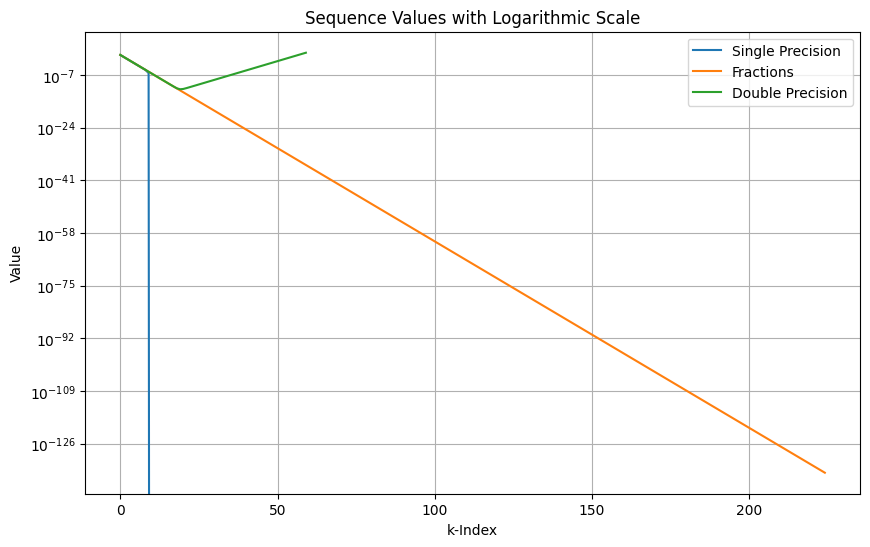

In [52]:
visualize_2_1()

In [53]:
#correct_values_single = np.float32([(4**-_)/3 for _ in range(n1)])
correct_values_single = np.float64([(4**-_)/3 for _ in range(n1)])
correct_values_double = np.float64([(4**-_)/3 for _ in range(n2)])
correct_values_fraction = [Fraction(1, 4**_ * 3) for _ in range(n3)]
#correct_values = [(4**-_)/3 for _ in range(max(n1, n2, n3))]

In [54]:
error_table_single = [abs((correct_values_single[_] - generated_values_single[_])/correct_values_single[_]) for _ in range(n1)]
error_table_double = [abs((correct_values_double[_] - generated_values_double[_])/correct_values_double[_]) for _ in range(n2)]
error_table_fraction = [abs((correct_values_fraction[_] - generated_values_fraction[_])/correct_values_fraction[_]) for _ in range(n3)]

In [55]:
def visualize_2_2():
    plt.figure(figsize=(10, 6))

    # Plot for generated_values_single
    plt.semilogy(range(n1), error_table_single, label='Single Precision')

    # Plot for generated_values_fraction
    plt.semilogy(range(n3), error_table_fraction, label='Fractions')

    # Plot for generated_values_double
    plt.semilogy(range(n2), error_table_double, label='Double Precision')

    plt.xlabel('k-Index')
    plt.ylabel('Value')
    plt.title('Sequence Error Values with Logarithmic Scale')
    plt.legend()
    plt.grid(True)
    plt.show()

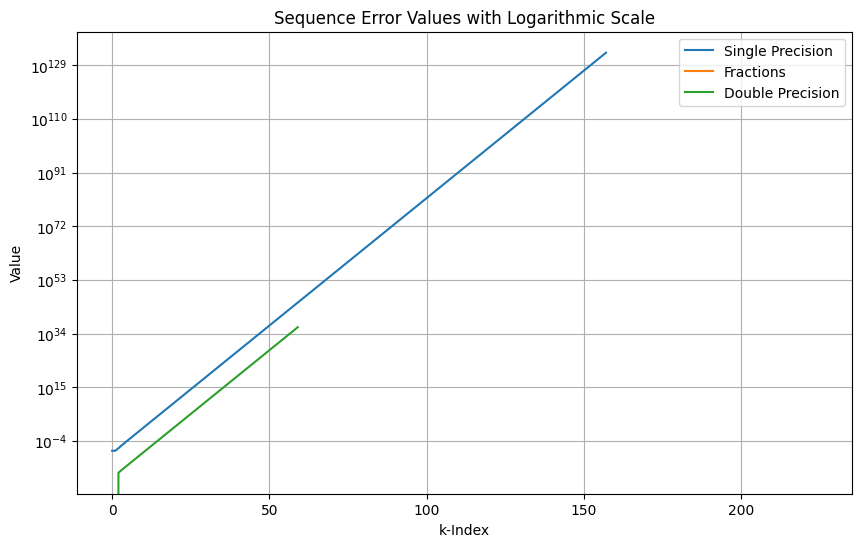

In [56]:
visualize_2_2()

In [57]:
print(generated_values_single)
print(generated_values_double)
print(generated_values_fraction)

[ 3.33333343e-01  8.33333358e-02  2.08333284e-02  5.20832092e-03
  1.30205788e-03  3.25469766e-04  8.12780345e-05  2.01406947e-05
  4.67754580e-06  4.54130713e-07 -1.31697880e-06 -3.19026776e-06
 -6.51961273e-06 -1.30739954e-05 -2.61566820e-05 -5.23155395e-05
 -1.04631617e-04 -2.09263380e-04 -4.18526819e-04 -8.37053638e-04
 -1.67410728e-03 -3.34821455e-03 -6.69642910e-03 -1.33928582e-02
 -2.67857164e-02 -5.35714328e-02 -1.07142866e-01 -2.14285731e-01
 -4.28571463e-01 -8.57142925e-01 -1.71428585e+00 -3.42857170e+00
 -6.85714340e+00 -1.37142868e+01 -2.74285736e+01 -5.48571472e+01
 -1.09714294e+02 -2.19428589e+02 -4.38857178e+02 -8.77714355e+02
 -1.75542871e+03 -3.51085742e+03 -7.02171484e+03 -1.40434297e+04
 -2.80868594e+04 -5.61737188e+04 -1.12347438e+05 -2.24694875e+05
 -4.49389750e+05 -8.98779500e+05 -1.79755900e+06 -3.59511800e+06
 -7.19023600e+06 -1.43804720e+07 -2.87609440e+07 -5.75218880e+07
 -1.15043776e+08 -2.30087552e+08 -4.60175104e+08 -9.20350208e+08
 -1.84070042e+09 -3.68140

In [58]:
print(error_table_single)
print(error_table_double)
print(error_table_fraction)

[2.9802322443206464e-08, 2.9802322443206464e-08, 2.3841857904605135e-07, 2.384185790960114e-06, 1.9550323486272614e-05, 0.00015687942504877261, 0.0012555122375487726, 0.010044574737548773, 0.08035707473754877, 0.6428570747375488, 5.142857074737549, 41.14285850524903, 329.1428527832031, 2633.142944335938, 21065.142578125, 168521.14843750003, 1348169.125, 10785353.500000002, 86282833.0, 690262657.0000001, 5522101249.0, 44176809985.00001, 353414479873.0, 2827315838977.0005, 22618526711809.0, 180948213694465.03, 1447585709555713.0, 1.1580685676445698e+16, 9.264548541156557e+16, 7.411638832925245e+17, 5.929311066340196e+18, 4.743448853072157e+19, 3.7947590824577257e+20, 3.0358072659661805e+21, 2.4286458127729444e+22, 1.9429166502183555e+23, 1.5543333201746844e+24, 1.2434666561397475e+25, 9.94773324911798e+25, 7.958186599294384e+26, 6.366549279435507e+27, 5.093239423548406e+28, 4.074591538838725e+29, 3.25967323107098e+30, 2.607738584856784e+31, 2.086190867885427e+32, 1.6689526943083417e+33, 